In [1]:
rootF = 'D:/Data/Paper defocus/Defocus detection data/'

In [ ]:
import csv
from numpy import *
import pickle as pickle

# Plotting
from matplotlib.pyplot import *
import seaborn as sns
from matplotlib import gridspec

from shared.save_load import *

In [3]:
experiments = [20211129, 20211207, 20211208]
trials = [20, 37, 67]
run_nbs = [65, 58, 30]
N_cells = [21, 32, 29]

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

# Load data

In [4]:
def get_euler():
    vec_path = rootF + '/MEA/'
    vec_path = vec_path + r"euler.vec"
    euler_vec = np.genfromtxt(vec_path)

    return euler_vec

### Load selected cell's responses to blurred images

In [5]:
clusters_all_experiments = []

for iExp, exp in enumerate(experiments):
    print (exp)
    trial = trials[iExp]
    run_nb = run_nbs[iExp]
    n_cells = N_cells[iExp]
    print (n_cells, 'cells')
    data_path = rootF + '/Modelling/exp' + str(exp) + '/'
    blur_data = load(data_path + '{}_spike_counts_CNN_{}cells_tr{}_run{}.npz'.format(exp, n_cells, trial, run_nb))

    spike_counts_mean = blur_data['spike_count_mean']
    spike_counts_std = blur_data['spike_count_std']
    clusters = blur_data['clusters']
    clusters_all_experiments.append(clusters)

    print (clusters)

20211129
21 cells
[  1  96 140 141 200 234 293 314 347 390 396 401 406 416 417 424 437 508
 558 583 614]
20211207
32 cells
[ 52  89  95  98 107 129 148 179 186 217 303 359 378 381 386 388 393 394
 396 399 402 414 417 418 433 435 459 472 491 498 507 575]
20211208
29 cells
[ 20  56  62  83 130 138 168 238 263 280 285 368 380 382 411 419 424 435
 450 463 464 466 480 482 497 507 511 513 613]


### Load model predictions

In [6]:
model_spike_counts_all_experiments = []

for iExp, exp in enumerate(experiments):
    print (exp)
    trial = trials[iExp]
    run_nb = run_nbs[iExp]
    n_cells = N_cells[iExp]
    path_to_trainig_results = rootF + "/Modelling/exp" + str(exp) + '/'
    model_predictions = load(path_to_trainig_results + "model_predictions_mouse_cnn_1000images_" + str(exp) + "_" + \
                                str(n_cells) + "cells_tr" + str(trial) + "_run" + str(run_nb) + ".npz")
    model_spike_counts = model_predictions['predictions']
    imagesNbs = model_predictions['images']

    model_spike_counts_all_experiments.append(model_spike_counts)

20211129
20211207
20211208


### Typing data

In [7]:
Folder = rootF + '/MEA/RGC typing/calcium comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     
        
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

In [8]:
# For each type, we store the corresponding cells per experiment 

euler_labels_cells_all_experiments = []
cells_clustering_all_experiments = []

for iLabel in range(len(euler_labels)):
    print (euler_labels[iLabel][0])
    euler_labels_cells = []
    
    for iExp, exp in enumerate(experiments):
        trial = trials[iExp]
        run_nb = run_nbs[iExp]
        n_cells = N_cells[iExp]
        exp_path = rootF + '/MEA/exp' + str(exp) + '/'

        # Load cells
        cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
        cells_clustering = array(cells_clustering)
        if exp == 20211208:
            cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden_cleaned_clus12_2024')
        else:
            cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden_cleaned_2024')

        cell_type = euler_labels[iLabel][0]
        selected_cells = cells_clustering[cell_types == iLabel]
        print (exp, selected_cells)

        euler_labels_cells.append(selected_cells)

    euler_labels_cells_all_experiments.append(euler_labels_cells)

euler_labels_cells_all_experiments = np.array(euler_labels_cells_all_experiments, dtype = 'object')

OFF local OS
20211129 []
20211207 []
20211208 [ 86 136 276 292 318 389 438]
OFF DS
20211129 []
20211207 [ 63 120 298 583]
20211208 []
OFF step
20211129 [390]
20211207 []
20211208 []
OFF slow
20211129 [140 508 625]
20211207 [240 253 277 378]
20211208 [ 20 125 195]
OFF alpha sustained
20211129 [437 677]
20211207 [ 26 421]
20211208 []
ON-OFF JAM-B
20211129 [399 401]
20211207 [205 507]
20211208 [138 263 271 411 419 420 421 450 464 471 480]
OFF sustained
20211129 []
20211207 [394 414 433 459 471 515]
20211208 []
OFF alpha transient
20211129 [ 79 422]
20211207 []
20211208 [ 10 361]
OFF mini alpha transient
20211129 []
20211207 [148 303 398 426 506 538]
20211208 [210 382 387 441 466 497 576 580 605 613]
ON-OFF local-edge W3
20211129 [188 614]
20211207 [392]
20211208 [368]
ON-OFF local
20211129 []
20211207 [44]
20211208 [83]
ON-OFF DS 1
20211129 []
20211207 []
20211208 []
ON-OFF DS 2
20211129 []
20211207 []
20211208 [359 532 592]
ON-OFF local OS
20211129 [ 27 558 681]
20211207 [165]
20211208 [

# Figures

20211129 614
20211207 359
20211208 56
20211208 368
20211208 482


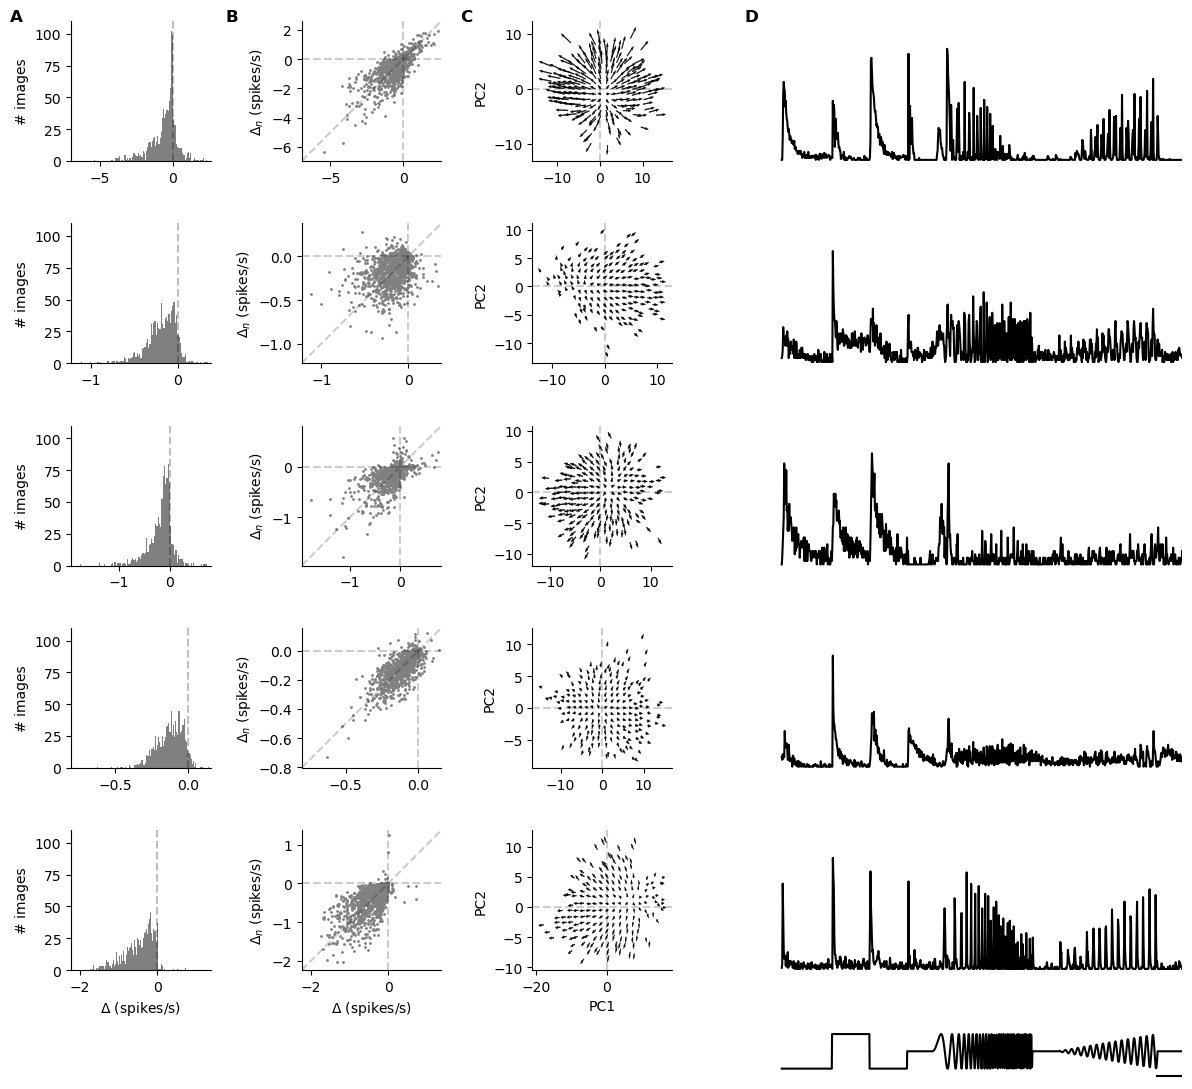

In [ ]:
src = 0
idx_ref = 0

fig = figure(figsize=(12,11))
GS = fig.add_gridspec(6, 4, width_ratios = [1,1,1,3], height_ratios = [3,3,3,3,3,1]) #, wspace=0.3)

exps = [20211129, 20211207, 20211208, 20211208, 20211208]
iExps = [0,1,2,2,2]
iCells = [20,11,1,11,23]

for i, iExp in enumerate(iExps):

    exp = exps[i] 
    data_path = rootF + '/MEA/exp' + str(exp) + '/'
    cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

    iCell = iCells[i]
    cell_nb = clusters_all_experiments[iExp][iCell]
    print (exp, cell_nb)

    dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                    model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
    dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                    model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

    lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
    lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

    ### Histo
    ax = fig.add_subplot(GS[i,0])
    ax.axvline(0, color='k',ls='--', alpha=0.25)
    ax.hist(dAct_original, bins=100, color='grey')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(lim_min, lim_max)
    ax.set_ylim(0, 110)
    ax.set_ylabel('# images')
    if i == 0:
        ax.text(1.6 * lim_min, 110, 'A', color='k', fontsize = 12, weight='bold')
    elif i == 4:
        ax.set_xlabel('$\Delta$ (spikes/s)')

    ### Scatter
    ax2 = fig.add_subplot(GS[i,1])
    ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
    ax2.axvline(0, color='k',ls='--',alpha=0.2)
    ax2.axhline(0, color='k',ls='--',alpha=0.2)
    ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(lim_min, lim_max)
    ax2.set_xlim(lim_min, lim_max)
    ax2.set_ylabel('$\Delta_n$ (spikes/s)')
    if i == 0:
        ax2.text(1.75 * lim_min, lim_max, 'B', color='k', fontsize = 12, weight='bold')
    elif i == 4:
        ax2.set_xlabel('$\Delta$ (spikes/s)')

    # Vector field
    ax = fig.add_subplot(GS[i,2])
    ### PCA components
    arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                    .format(experiments[iExp], trials[iExp], cell_nb)
    data_arrows = np.load(arrow_file)
    PC1 = data_arrows['PC1']
    PC2 = data_arrows['PC2']
    ### Arrow plots
    binned_arrowtails = data_arrows['tails']
    binned_arrowheads = data_arrows['heads']
    for k,j in enumerate(binned_arrowtails[:,0]):
        if k==0:
            ax.arrow(j,binned_arrowtails[k,1],binned_arrowheads[k,0],binned_arrowheads[k,1],width=0.15,lw=0.25,color='k')
        else:
            ax.arrow(j,binned_arrowtails[k,1],binned_arrowheads[k,0],binned_arrowheads[k,1],width=0.15,lw=0.25,color='k')
    ax.axvline(0, color='k',ls='--',alpha=0.2)
    ax.axhline(0, color='k',ls='--',alpha=0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('PC2')
    if i == 4:
        ax.set_xlabel('PC1')
    if i == 0:
        ax.text(-32.5, 12.25, 'C', color='k', fontsize = 12, weight='bold')

    # Chirp
    ax = fig.add_subplot(GS[i,3])
    ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
    ax.set_ylim(-0.01,1.25)
    ax.set_xlim(-1.5,32)
    ax.axis('off')
    if i == 0:
        ax.text(-3, 1.25, 'D', color='k', fontsize = 12, weight='bold')

### Chirp stim
euler_vec= get_euler()
ax = fig.add_subplot(GS[5,3])
ax.plot(np.linspace(0,32,1600), euler_vec[150:1750,1]/np.amax(euler_vec[150:1750,1]), color='k')
ax.plot([30,32],[-0.2,-0.2], 'k-')
ax.set_ylim(-0.3,1.05)
ax.set_xlim(-1.5,32)
ax.axis('off')

tight_layout()

### Save figure
fig_path = 'T:/Documents/Papier defocus/figures/papier/'
fsave = fig_path + 'Supp_fig_other_cells'
# fig.savefig(fsave+'.pdf', format='pdf', dpi=300)
# fig.savefig(fsave+'.png', format='png', dpi=300)

20211129 614
20211207 359
20211208 56
20211208 368
20211208 482


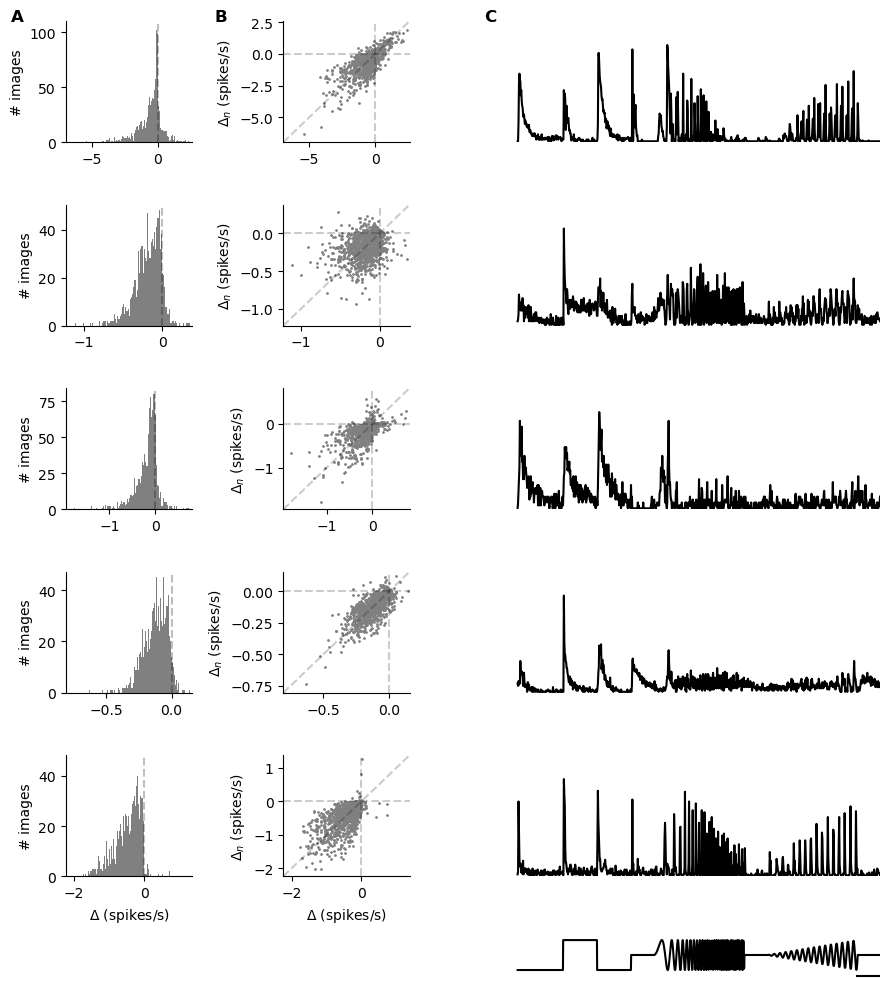

In [ ]:
src = 0
idx_ref = 0

fig = figure(figsize=(9,10))

GS = fig.add_gridspec(6, 3, width_ratios = [1,1,3], height_ratios = [3,3,3,3,3,1])

### EXP 20211129
exp = 20211129
data_path = rootF + '/MEA/exp' + str(exp) + '/'
cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

### CELL 614
iExp = 0
iCell = 20
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[0,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_ylim(0, 110)
ax.set_ylabel('# images')
ax.text(1.6 * lim_min, 110, 'A', color='k', fontsize = 12, weight='bold')

ax2 = fig.add_subplot(GS[0,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')
ax2.text(1.75 * lim_min, lim_max, 'B', color='k', fontsize = 12, weight='bold')

# Chirp
ax = fig.add_subplot(GS[0,2])
# ax.set_title('ON-OFF local edge W3')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')
ax.text(-3, 1.25, 'C', color='k', fontsize = 12, weight='bold')


### EXP 20211207
exp = 20211207
data_path = rootF + '/MEA/exp' + str(exp) + '/'
cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

### CELL 359
iExp = 1
iCell = 11
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[1,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_ylabel('# images')

ax2 = fig.add_subplot(GS[1,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')

### Chirp
ax = fig.add_subplot(GS[1,2])
# ax.set_title('ON local sustained')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### EXP20211208
exp = 20211208
data_path = rootF + '/MEA/exp' + str(exp) + '/'
cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

### CELL 56
iExp = 2
iCell = 1
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[2,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_ylabel('# images')

ax2 = fig.add_subplot(GS[2,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')

### Chirp
ax = fig.add_subplot(GS[2,2])
# ax.se
# t_title('??')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### CELL 368
iExp = 2
iCell = 11
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[3,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('# images')
ax.set_xlim(lim_min, lim_max)

ax2 = fig.add_subplot(GS[3,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')

### Chirp
ax = fig.add_subplot(GS[3,2])
# ax.set_title('ON-OFF local edge W3')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### CELL 482
iExp = 2
iCell = 23
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[4,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_xlabel('$\Delta$ (spikes/s)')
ax.set_ylabel('# images')

ax2 = fig.add_subplot(GS[4,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')
ax2.set_xlabel('$\Delta$ (spikes/s)')

### Chirp
ax = fig.add_subplot(GS[4,2])
# ax.set_title('??')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### Chirp stim
euler_vec= get_euler()
ax = fig.add_subplot(GS[5,2])
ax.plot(np.linspace(0,32,1600), euler_vec[150:1750,1]/np.amax(euler_vec[150:1750,1]), color='k')
ax.plot([30,32],[-0.2,-0.2], 'k-')
ax.set_ylim(-0.3,1.05)
ax.set_xlim(-1.5,32)
ax.axis('off')

tight_layout()

### Save figure
fig_path = 'T:/Documents/Papier defocus/figures/papier/'
fsave = fig_path + 'Supp_fig_other_cells'
# fig.savefig(fsave+'.pdf', format='pdf', dpi=300)
# fig.savefig(fsave+'.png', format='png', dpi=300)

# With vector field

20211129 614
20211207 359
20211208 56
20211208 368
20211208 482


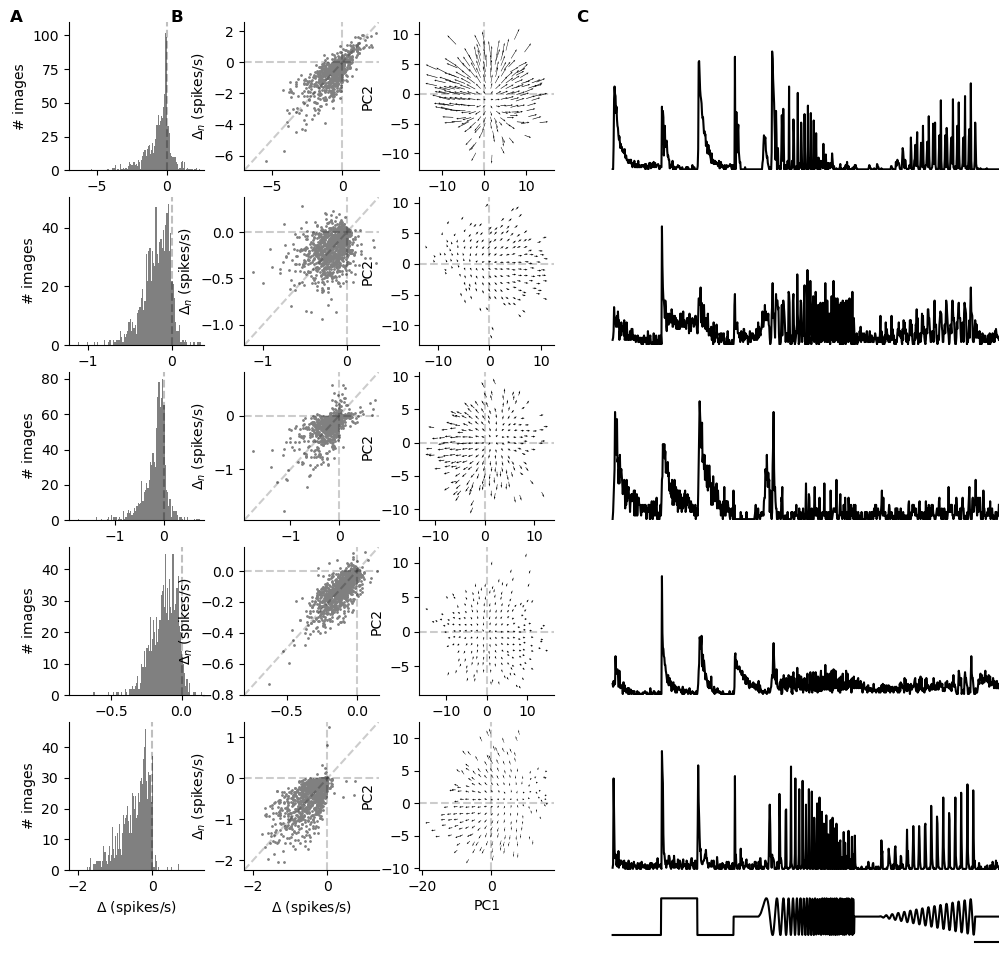

In [29]:
src = 0
idx_ref = 0

fig = figure(figsize=(12,12))

GS = fig.add_gridspec(6, 4, width_ratios = [1,1,1,3], height_ratios = [3,3,3,3,3,1]) #, wspace=0.3)

### EXP 20211129
exp = 20211129
data_path = rootF + '/MEA/exp' + str(exp) + '/'
cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

### CELL 614
iExp = 0
iCell = 20
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[0,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_ylim(0, 110)
ax.set_ylabel('# images')
ax.text(1.6 * lim_min, 110, 'A', color='k', fontsize = 12, weight='bold')

ax2 = fig.add_subplot(GS[0,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')
ax2.text(1.75 * lim_min, lim_max, 'B', color='k', fontsize = 12, weight='bold')

# Vector field
ax = fig.add_subplot(GS[0,2])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)

data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']

for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')

ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Chirp
ax = fig.add_subplot(GS[0,3])
# ax.set_title('ON-OFF local edge W3')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')
ax.text(-3, 1.25, 'C', color='k', fontsize = 12, weight='bold')

### EXP 20211207
exp = 20211207
data_path = rootF + '/MEA/exp' + str(exp) + '/'
cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

### CELL 359
iExp = 1
iCell = 11
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[1,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_ylabel('# images')

ax2 = fig.add_subplot(GS[1,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')

# Vector field
ax = fig.add_subplot(GS[1,2])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)

data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']

for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')

ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### Chirp
ax = fig.add_subplot(GS[1,3])
# ax.set_title('ON local sustained')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### EXP20211208
exp = 20211208
data_path = rootF + '/MEA/exp' + str(exp) + '/'
cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

### CELL 56
iExp = 2
iCell = 1
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[2,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_ylabel('# images')

ax2 = fig.add_subplot(GS[2,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')

# Vector field
ax = fig.add_subplot(GS[2,2])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)

data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']

for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')

ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### Chirp
ax = fig.add_subplot(GS[2,3])
# ax.se
# t_title('??')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### CELL 368
iExp = 2
iCell = 11
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[3,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('# images')
ax.set_xlim(lim_min, lim_max)

ax2 = fig.add_subplot(GS[3,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')

# Vector field
ax = fig.add_subplot(GS[3,2])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)

data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']

for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')

ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### Chirp
ax = fig.add_subplot(GS[3,3])
# ax.set_title('ON-OFF local edge W3')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### CELL 482
iExp = 2
iCell = 23
cell_nb = clusters_all_experiments[iExp][iCell]
print (exp, cell_nb)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, iCell]
dAct_inverted = model_spike_counts_all_experiments[iExp][:, 1, -1, src, iCell] - \
                model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, iCell]

lim_min = 1.1 * min([amin(dAct_original), amin(dAct_inverted)])
lim_max = 1.1 * max([amax(dAct_original), amax(dAct_inverted)])

ax = fig.add_subplot(GS[4,0])
ax.axvline(0, color='k',ls='--', alpha=0.25)
ax.hist(dAct_original, bins=100, color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(lim_min, lim_max)
ax.set_xlabel('$\Delta$ (spikes/s)')
ax.set_ylabel('# images')

ax2 = fig.add_subplot(GS[4,1])
ax2.plot([lim_min,lim_max], [lim_min,lim_max], 'k--',alpha=0.2)
ax2.axvline(0, color='k',ls='--',alpha=0.2)
ax2.axhline(0, color='k',ls='--',alpha=0.2)
ax2.scatter(dAct_original, dAct_inverted, s=1, color = 'grey')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim(lim_min, lim_max)
ax2.set_xlim(lim_min, lim_max)
ax2.set_ylabel('$\Delta_n$ (spikes/s)')
ax2.set_xlabel('$\Delta$ (spikes/s)')

# Vector field
ax = fig.add_subplot(GS[4,2])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)

data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']

for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='k')

ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

### Chirp
ax = fig.add_subplot(GS[4,3])
# ax.set_title('??')
ax.plot(np.linspace(0,32,800), cell_data[cell_nb]['psth']/np.amax(cell_data[cell_nb]['psth']), 'k')
ax.set_ylim(-0.01,1.25)
ax.set_xlim(-1.5,32)
ax.axis('off')

### Chirp stim
euler_vec= get_euler()
ax = fig.add_subplot(GS[5,3])
ax.plot(np.linspace(0,32,1600), euler_vec[150:1750,1]/np.amax(euler_vec[150:1750,1]), color='k')
ax.plot([30,32],[-0.2,-0.2], 'k-')
ax.set_ylim(-0.3,1.05)
ax.set_xlim(-1.5,32)
ax.axis('off')

# tight_layout()

### Save figure
fig_path = 'T:/Documents/Papier defocus/figures/papier/'
fsave = fig_path + 'Supp_fig_other_cells'
# fig.savefig(fsave+'.pdf', format='pdf', dpi=300)
# fig.savefig(fsave+'.png', format='png', dpi=300)